# Fashion MNIST 데이터셋

## 개요
Fashion MNIST는 전통적인 MNIST 데이터셋을 대체하기 위해 제안된 의류 이미지들로 구성된 데이터셋입니다. 이 데이터셋은 Zalando의 기사 이미지를 기반으로 하며, 기계 학습 모델의 벤치마킹과 알고리즘 테스트에 주로 사용됩니다. 각 이미지는 28x28 픽셀의 흑백 이미지이며, 총 10개의 다른 카테고리로 분류됩니다.

1. **T-shirt/top (티셔츠/탑)** - 일반적인 반팔 티셔츠 또는 탱크탑 형태의 의류.
2. **Trouser (바지)** - 일반적인 긴 바지.
3. **Pullover (풀오버)** - 머리를 통해 입을 수 있는 스웨터나 스웨트셔츠.
4. **Dress (드레스)** - 다양한 스타일과 길이의 여성용 드레스.
5. **Coat (코트)** - 보통 긴 소매와 열린 앞면을 가진 두꺼운 외투.
6. **Sandal (샌들)** - 발의 상당 부분을 드러내는 개방형 신발.
7. **Shirt (셔츠)** - 더 정장 스타일의, 주로 버튼이 있는 긴팔의 상의.
8. **Sneaker (스니커즈)** - 일반적으로 스포츠나 캐주얼 착용용도의 신발.
9. **Bag (가방)** - 다양한 스타일과 크기의 핸드백, 백팩, 지갑 등을 포함.
10. **Ankle boot (앵클 부츠)** - 발목까지 오는 길이의 부츠.


(링크: https://www.kaggle.com/datasets/zalando-research/fashionmnist)

## 구성
- **훈련 데이터**: 60,000개의 예제
- **테스트 데이터**: 10,000개의 예제
- **이미지 크기**: 28x28 픽셀
- **채널**: 흑백 (1채널)
- **라벨**: 10가지 패션 카테고리



### 1. Fashion MNIST 데이터 불러오기 (전처리 포함)

코드 설명:

- 데이터 로딩: fashion_mnist.load_data() 함수를 사용해 MNIST 데이터셋을 로드합니다. 이 함수는 훈련 세트(X_train, y_train)와 테스트 세트(X_test, y_test)를 반환합니다.

- 데이터 전처리: 이미지 데이터(X_train, X_test)는 28x28 픽셀 크기로 다음과 같은 과정을 거칩니다.
  - 모양 변환 (reshape)
    - -1: 전체 데이터셋을 변환할 때 샘플 개수는 유지합니다.
    - (28, 28, 1): 각 샘플을 28x28 크기의 흑백 이미지로 변환합니다.
  - 자료형 변환 (astype)
    - 'float32': 데이터를 32비트 부동소수점 형식으로 변환합니다.
  - 정규화 (/ 255)
    - 모든 픽셀 값을 0과 1 사이의 값으로 정규화합니다.


- 레이블 원-핫 인코딩: to_categorical 함수를 사용해 레이블을 원-핫 인코딩 형식으로 변환합니다. 이는 분류 문제에서 클래스 레이블을 효과적으로 처리하기 위함입니다.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# 데이터 불러오기
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# 데이터 전처리 (CNN을 활용하기 위한 방법으로 전처리)
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255

# 레이블 원-핫 인코딩
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### 2. 모델 생성하기

코드 설명:

- Sequential 클래스: TensorFlow의 Sequential 클래스를 사용하여 모델을 생성합니다. 이 클래스는 레이어를 순차적으로 쌓아 올릴 수 있도록 합니다. 각 레이어는 입력 데이터를 받아 처리 후 출력 데이터를 다음 레이어로 전달합니다.

- Conv2D (합성곱 레이어)
  - 무엇을 하나요? 이미지를 여러 개의 필터로 스캔하여 특징을 찾아냅니다.
  - 예시:
    - Conv2D(32, (3, 3), activation='relu')
    - → 32개의 3x3 필터로 특징을 찾아냄.
- MaxPooling2D (최대 풀링 레이어)
  - 무엇을 하나요? 이미지를 축소하면서 중요한 정보만 남깁니다.
  - 예시:
    - MaxPooling2D((2, 2))
    - → 2x2 영역에서 가장 큰 값만 선택해 크기를 줄임.
- Flatten (평탄화 레이어)
  - 무엇을 하나요? 다차원 배열을 1차원으로 펼쳐서 Dense 레이어에 전달합니다.
  - 예시:
    - Flatten()
    - → 3차원 이미지를 하나의 긴 1차원 벡터로 변환.

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.initializers import HeNormal

# CNN 모델 생성
model = Sequential([
    Conv2D(28, (3, 3), activation='relu', kernel_initializer=HeNormal(), input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    
    Dense(10, activation='softmax')

])

# 모델 정보 출력
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 28)     │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 26, 26, 28)     │           112 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 28)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 13, 13, 28)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 11, 11, 64)     │        16,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 240,594 (939.82 KB)

 Trainable params: 239,898 (937.10 KB)

 Non-trainable params: 696 (2.72 KB)

### 3. 모델 컴파일하기

코드 설명:

- 컴파일: 모델을 컴파일하는 단계에서는, 손실 함수로 'categorical_crossentropy'를 사용하고, 최적화 알고리즘으로 'adam'을 지정합니다.
  - 또한 평가 지표로 'accuracy'를 추가합니다.

In [9]:
# Adam import
from tensorflow.keras.optimizers import Adam

# 모델 컴파일, Adam 최적화 알고리즘 인스턴스화 및 학습률 설정
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

### 4. 모델 학습하기
코드 설명:

- 훈련: model.fit 메소드를 사용하여 모델을 훈련시킵니다. 여기서는 10번의 에폭 동안, 배치 크기를 128로 설정하고, 훈련 데이터의 20%를 검증 데이터로 사용합니다.

In [10]:
# 모델 학습
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - accuracy: 0.7813 - loss: 0.6182 - val_accuracy: 0.7922 - val_loss: 0.5732
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.8792 - loss: 0.3292 - val_accuracy: 0.8833 - val_loss: 0.3257
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.8932 - loss: 0.2859 - val_accuracy: 0.8948 - val_loss: 0.2853
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.9064 - loss: 0.2550 - val_accuracy: 0.8968 - val_loss: 0.2986
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.9129 - loss: 0.2312 - val_accuracy: 0.9057 - val_loss: 0.2631
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.9234 - loss: 0.2092 - val_accuracy: 0.9153 - val_loss: 0.2388
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.9253 - loss: 0.1989 - val_accuracy: 0.9082 - val_loss: 0.2481
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.9312 - loss: 0.1822 - 

### 5. 모델 평가하기

코드 설명:

- 평가: model.predict 메소드를 사용하여 테스트 데이터셋의 피쳐을 기반으로 레이블을 예측합니다.
  - classification_report를 통해 모델의 성능을 확인합니다.

In [11]:
from sklearn.metrics import classification_report

# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print('loss:', loss, 'accuracy:', accuracy)

predictions = model.predict(X_test)
predictions = predictions.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# classification_report 출력
print(classification_report(y_true, predictions))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9061 - loss: 0.2710
loss: 0.26265352964401245 accuracy: 0.909500002861023
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.91      0.82      0.86      1000
           3       0.93      0.92      0.92      1000
           4       0.84      0.90      0.87      1000
           5       0.99      0.97      0.98      1000
           6       0.71      0.78      0.75      1000
           7       0.90      0.99      0.94      1000
           8       0.98      0.98      0.98      1000
           9       0.99      0.92      0.95      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



### 6. 추론 결과 시각화

코드 설명:

- 테스트 데이터 샘플 추출: np.random.choice를 사용하여 무작위로 3개의 테스트 샘플을 선택합니다.

- 모델 예측 및 시각화:
  - 각 샘플에 대해 예측을 수행하고, 해당 샘플의 이미지와 예측된 숫자, 실제 레이블을 matplotlib를 사용하여 시각화합니다.
  - 각 클래스에 대한 예측 확률을 바 그래프로 표시하여 모델이 어떤 클래스에 대해 높은 확신을 가지고 예측하는지 확인합니다.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


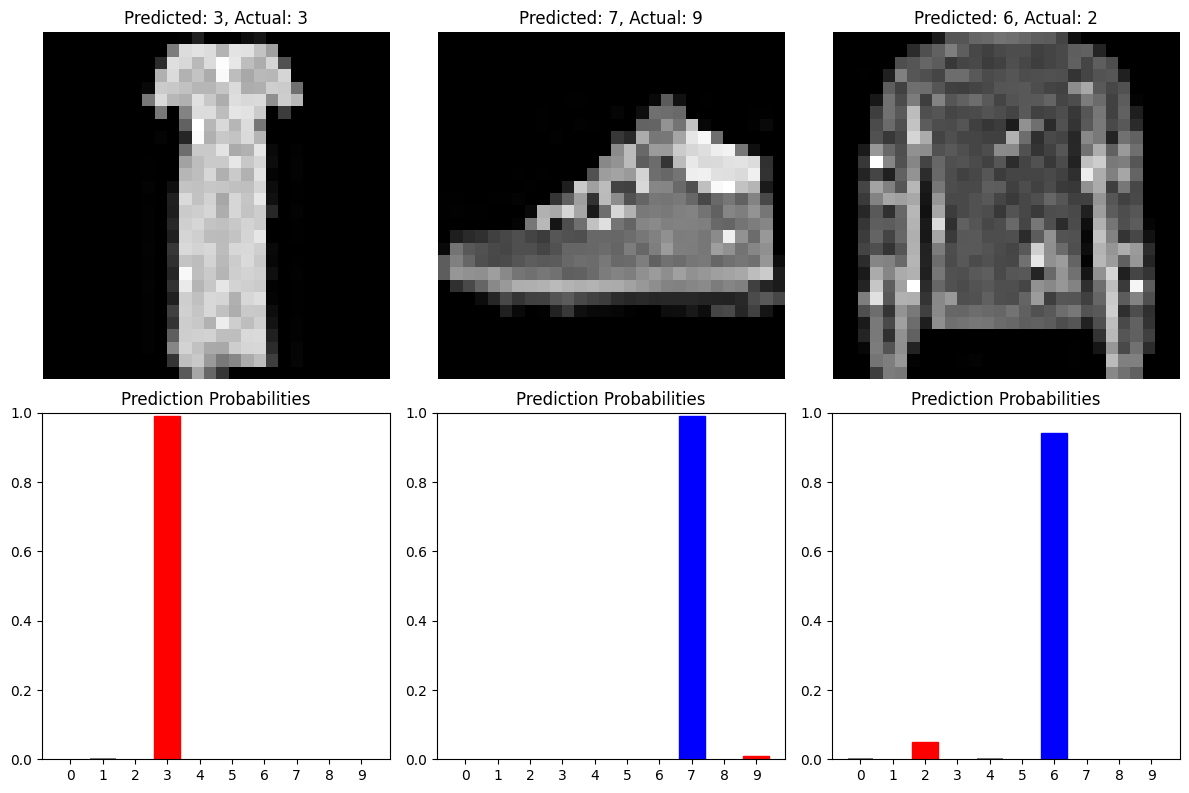

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# 테스트 데이터에서 3개 샘플 추출
indices = np.random.choice(range(len(X_test)), 3)
samples = X_test[indices]
predictions = model.predict(samples)

# 예측 결과 및 확률 시각화
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
for i, (sample, prediction) in enumerate(zip(samples, predictions)):
    # 이미지 출력
    ax = axes[0, i]
    ax.imshow(sample.reshape(28, 28), cmap='gray')
    ax.set_title(f"Predicted: {np.argmax(prediction)}, Actual: {np.argmax(y_test[indices[i]])}")
    ax.axis('off')

    # 확률 바 그래프 출력
    ax = axes[1, i]
    bar_list = ax.bar(range(10), prediction, color='gray')
    bar_list[np.argmax(prediction)].set_color('blue')
    bar_list[np.argmax(y_test[indices[i]])].set_color('red')
    ax.set_ylim([0, 1])
    ax.set_xticks(range(10))
    ax.set_title("Prediction Probabilities")

plt.tight_layout()
plt.show()

# (심화) ResNet 모델 사용하기

### (심화) ResNet을 위한 데이터 불러오기 데이터 불러오기 (전처리 포함)

ResNet의 경우, 컬러이미지만 받을 수 있으므로 흑백 이미지를 컬러처럼 다루는 전처리를 해줘야 합니다.

In [13]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# 데이터 불러오기 (훈련 데이터와 테스트 데이터로 나눔)
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# 데이터 전처리 - 채널 추가 후 크기 32x32로 변경
X_train = tf.image.resize_with_pad(X_train[..., tf.newaxis], 32, 32)
X_test = tf.image.resize_with_pad(X_test[..., tf.newaxis], 32, 32)

# 흑백 이미지를 RGB로 변환하고 0~1 사이 값으로 정규화
X_train = tf.image.grayscale_to_rgb(X_train).numpy().astype('float32') / 255
X_test = tf.image.grayscale_to_rgb(X_test).numpy().astype('float32') / 255

# 레이블을 원-핫 인코딩 형태로 변환
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


### (심화) Resnet을 활용하여 모델 생성하기

In [14]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Flatten
from tensorflow.keras.models import Model

# 모델 생성하기 , 최상위 레이어는 제외하고 불러오기, imagenet으로 사전 학습된 가중치 불러오기('none'도 가능)
base_model = ResNet50(include_top=False, weights='imagenet', input_tensor=Input(shape=(32, 32, 3)))

# 베이스 모델의 출력에 새로운 레이어 추가
x = base_model.output

# 1차원 데이터로 변경 
x = Flatten()(x)

# 완전 연결층 추가
x = Dense(128, activation='relu')(x)

# 출력 레이어(10개 클래스 분류)
predictions = Dense(10, activation='softmax')(x)

# 모델 인스턴스 생성
resnet = Model(inputs=base_model.input, outputs=predictions)

# 베이스 모델의 레이어를 학습하지 않도록 고정(False)
for layer in base_model.layers:
    layer.trainable = False
    # 호기심이 있으신 분들은 Resnet50을 진짜로 학습하면 어떻게 되나 True로 지정하고 학습해보세요(비추)


# 모델 정보 출력
resnet.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 38, 38, 3) │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 16, 16,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 16, 16,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 16, 16,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 18, 18,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 8, 8, 64)  │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 8, 8, 64)  │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_1_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 8, 8, 64)  │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_2_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 8, 8, 256) │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 8, 8, 256) │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_3_c

 Total params: 23,851,274 (90.99 MB)

 Trainable params: 263,562 (1.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

### (심화) Resnet 모델 학습

In [23]:
from tensorflow.keras.optimizers import Adam

# 모델 컴파일, Adam 최적화 알고리즘 인스턴스화 및 학습률 설정
optimizer = Adam(learning_rate=0.001)
resnet.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
resnet.fit(X_train, y_train, epochs=1, batch_size=128, validation_split=0.2)

375/375 ━━━━━━━━━━━━━━━━━━━━ 67s 160ms/step - accuracy: 0.6977 - loss: 0.8424 - val_accuracy: 0.7138 - val_loss: 0.7670


### (심화) Resnet 모델 평가

In [25]:
# 모델 평가(분류 보고서)
from sklearn.metrics import classification_report

loss, accuracy = resnet.evaluate(X_test, y_test)
print('loss:', loss, 'accuracy:', accuracy)

predictions = resnet.predict(X_test)
predictions = predictions.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# 분류 보고서 출력
print(classification_report(y_true, predictions))

313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.7089 - loss: 0.7893
loss: 0.7874897718429565 accuracy: 0.7098000049591064
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step
              precision    recall  f1-score   support

           0       0.66      0.71      0.68      1000
           1       0.86      0.94      0.90      1000
           2       0.57      0.57      0.57      1000
           3       0.81      0.60      0.69      1000
           4       0.75      0.24      0.36      1000
           5       0.89      0.85      0.87      1000
           6       0.34      0.57      0.43      1000
           7       0.76      0.90      0.82      1000
           8       0.85      0.90      0.87      1000
           9       0.93      0.82      0.87      1000

    accuracy                           0.71     10000
   macro avg       0.74      0.71      0.71     10000
weighted avg       0.74      0.71      0.71     10000



### (심화) ResNet을 위한 추론 결과 시각화

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


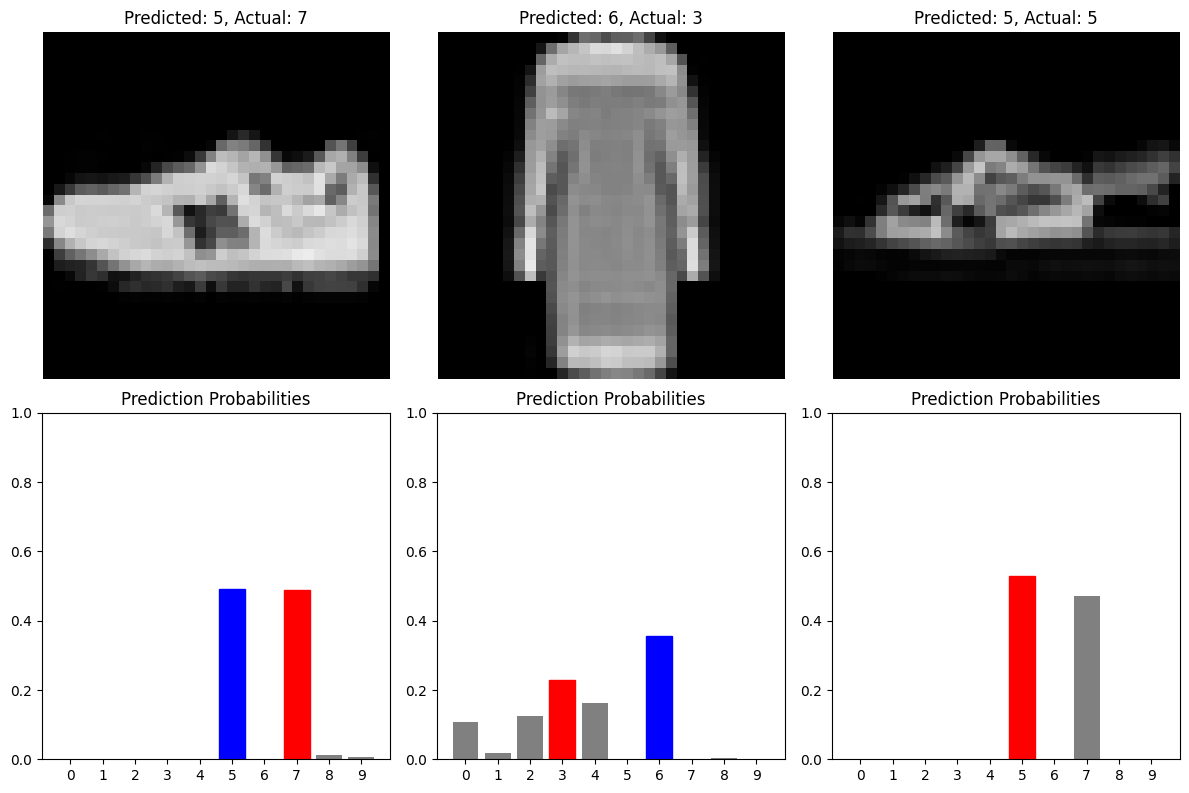

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# 테스트 데이터에서 3개 샘플 추출
indices = np.random.choice(range(len(X_test)), 3)
samples = X_test[indices]
predictions = resnet.predict(samples)

# 예측 결과 및 확률 시각화
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
for i, (sample, prediction) in enumerate(zip(samples, predictions)):
    # 이미지 출력
    ax = axes[0, i]
    ax.imshow(sample, cmap='gray')
    ax.set_title(f"Predicted: {np.argmax(prediction)}, Actual: {np.argmax(y_test[indices[i]])}")
    ax.axis('off')

    # 확률 바 그래프 출력
    ax = axes[1, i]
    bar_list = ax.bar(range(10), prediction, color='gray')
    bar_list[np.argmax(prediction)].set_color('blue')
    bar_list[np.argmax(y_test[indices[i]])].set_color('red')
    ax.set_ylim([0, 1])
    ax.set_xticks(range(10))
    ax.set_title("Prediction Probabilities")

plt.tight_layout()
plt.show()